In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Read in data from NASA exoplenet archive 
df = pd.read_csv(r"C:\Users\julia\Downloads\csv_main.csv", skiprows=78)
print(df.columns)

Index(['pl_name', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
       'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim',
       'sy_dist', 'sy_disterr1', 'sy_d

In [8]:
# Linear Regression Analysis
"""
Performs linear regression analysis between two variables in a DataFrame.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
"""

def linear_regression_analysis(df, predictor_var, response_var):
    # Filtering out Nan values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]]
    y = df_filtered[response_var] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"Linear Regression Analysis for {predictor_var} vs {response_var}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plot results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression: {predictor_var} vs {response_var}')
    plt.xlabel(predictor_var)
    plt.ylabel(response_var)
    plt.legend()
    plt.show()
    
# Polynomial Regression Analysis
"""
Performs polynomial regression analysis between two variables in a DataFrame.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
degree: The degree of the polynomial regression.
x_label: Custom label for the x-axis.
y_label: Custom label for the y-axis.
"""

def polynomial_regression_analysis(df, predictor_var, response_var, degree, x_label, y_label):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]] 
    y = df_filtered[response_var] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    X_test_poly = poly.transform(X_test)
    y_pred_poly = model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    # Print results
    print(f"Polynomial Regression (Degree = {degree}):")
    print("Mean Squared Error:", mse_poly)
    print("R-squared:", r2_poly)

    sorted_indices = np.argsort(X_test.iloc[:, 0])
    X_test_sorted = X_test.iloc[sorted_indices, 0]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred_poly[sorted_indices]
    
    # Plot results
    plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree = {degree}): {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    
# Random Forest Regression Analysis
"""
Performs Random Forest regression analysis between two variables in a DataFrame.
Random Forest Regression is a machine learning technique that builds multiple decision trees and merges their outputs.
It is good for regression tasks, and handling non-linear data.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
x_label: Custom label for the x-axis.
y_label: Custom label for the y-axis.
n_estimators: Number of trees in the random forest.
show_feature_importance: Whether to display feature importances.
"""

def random_forest_regression_analysis(df, predictor_var, response_var, x_label, y_label, n_estimators=100, show_feature_importance=False):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]]  
    y = df_filtered[response_var]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Displaying the results
    print("Random Forest Regression:")
    print("Mean Squared Error:", mse_rf)
    print("R-squared:", r2_rf)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred_rf, color='red', label='Predicted')
    plt.title(f'Random Forest Regression: {x_label} vs {y_label}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

    # Feature Importance
    if show_feature_importance:
        feature_importances = rf_model.feature_importances_
        print("Feature Importances:", feature_importances)
        
# Random Forest Regression Analysis with best parameters
"""
Systematically explores a range of hyperparameters, and selects the set that returns the best results.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
param_grid: The grid of hyperparameters to search for the best performance.
cv: Number of cross-validation folds.
scoring: Scoring method used for the grid search.
"""        
        
def best_parameters_random_forest(df, predictor_var, response_var, x_label, y_label, param_grid, cv=3, scoring='neg_mean_squared_error'):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]] 
    y = df_filtered[response_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    rf = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=cv, n_jobs=-1, verbose=2, scoring=scoring)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    best_rf = RandomForestRegressor(**best_params, random_state=0)
    best_rf.fit(X_train, y_train)
    y_pred_best_rf = best_rf.predict(X_test)
    mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
    r2_best_rf = r2_score(y_test, y_pred_best_rf)

    # Displaying the results
    print("Random Forest Regression with Best Parameters:")
    print("Mean Squared Error:", mse_best_rf)
    print("R-squared:", r2_best_rf)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred_best_rf, color='red', label='Predicted')
    plt.title(f'Optimized Random Forest Regression: {predictor_var} vs {response_var}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
def linear_regression_analysis(df, predictor_var, response_var, x_label, y_label):
    """
    Performs linear regression analysis between two variables in a DataFrame with custom axis labels.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var (str): The name of the column to be used as the predictor variable.
    response_var (str): The name of the column to be used as the response variable.
    x_label (str): Custom label for the x-axis.
    y_label (str): Custom label for the y-axis.
    """
    # Filtering out rows with NaN values in the specified columns
    df_filtered = df.dropna(subset=[predictor_var, response_var])

    # Prepare the data
    X = df_filtered[[predictor_var]]  # Predictor variable
    y = df_filtered[response_var]  # Response variable

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Displaying the results
    print(f"Linear Regression Analysis for {x_label} vs {y_label}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Example usage:
linear_regression_analysis(df, 'pl_bmasse', 'pl_orbsmax', 'Planet Mass', 'Semi-Major Axis')


Analysis for Orbital period vs Semi-Major Axis
Should be very close to having complete correlation, as 

Linear Regression Analysis for pl_orbper vs pl_orbsmax
Mean Squared Error: 2.6518583544752996
R-squared: 0.7911563873826749


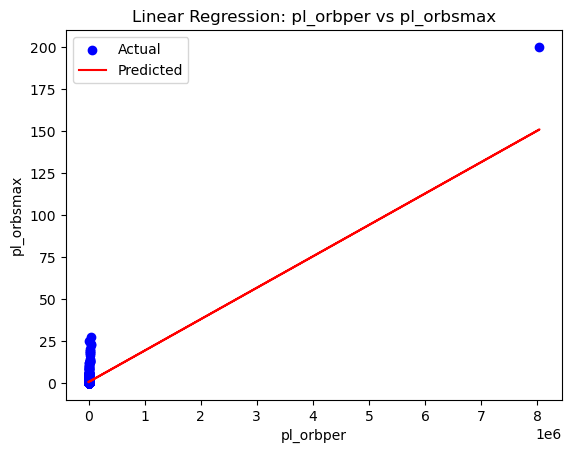

In [14]:
linear_regression_analysis(df, 'pl_orbper', 'pl_orbsmax')